In [1]:
%load_ext autoreload
%autoreload 2
%run ./initializer

Added the path (/Users/rik/Documents/VU/DMT/DataMiningTechniquesA1) to sys.path


In [2]:
import polars as pl
from datetime import datetime, date
import pandas as pd
from matplotlib import pyplot as plt

from data_exploration import DataExplorer
from data_loading import DataPreprocessor

In [3]:
# Set Polars to ignore auto-detection and use full width manually
pl.Config.set_tbl_width_chars(200)  # Adjust this based on your screen width

# Optional: Set number of rows/columns to show
pl.Config.set_tbl_rows(50)
pl.Config.set_tbl_cols(50)

polars.config.Config

In [4]:
data_explorer = DataExplorer()


In [5]:
df = data_explorer.load_data()

In [6]:
dict = data_explorer.get_aggregated_data_info(df)

Number of observations: 376912
Number of unique values: {'id': 27, 'time': 336907, 'variable': 19}
Number of null values: shape: (1, 4)
┌─────┬──────┬──────────┬───────┐
│ id  ┆ time ┆ variable ┆ value │
│ --- ┆ ---  ┆ ---      ┆ ---   │
│ u32 ┆ u32  ┆ u32      ┆ u32   │
╞═════╪══════╪══════════╪═══════╡
│ 0   ┆ 0    ┆ 0        ┆ 202   │
└─────┴──────┴──────────┴───────┘
The variables that contain null values: shape: (2, 1)
┌────────────────────┐
│ variable           │
│ ---                │
│ str                │
╞════════════════════╡
│ circumplex.valence │
│ circumplex.arousal │
└────────────────────┘
The variable and id combinations that contain null values: shape: (29, 2)
┌─────────┬────────────────────┐
│ id      ┆ variable           │
│ ---     ┆ ---                │
│ str     ┆ str                │
╞═════════╪════════════════════╡
│ AS14.01 ┆ circumplex.arousal │
│ AS14.01 ┆ circumplex.valence │
│ AS14.05 ┆ circumplex.arousal │
│ AS14.05 ┆ circumplex.valence │
│ AS14.06 ┆ circu

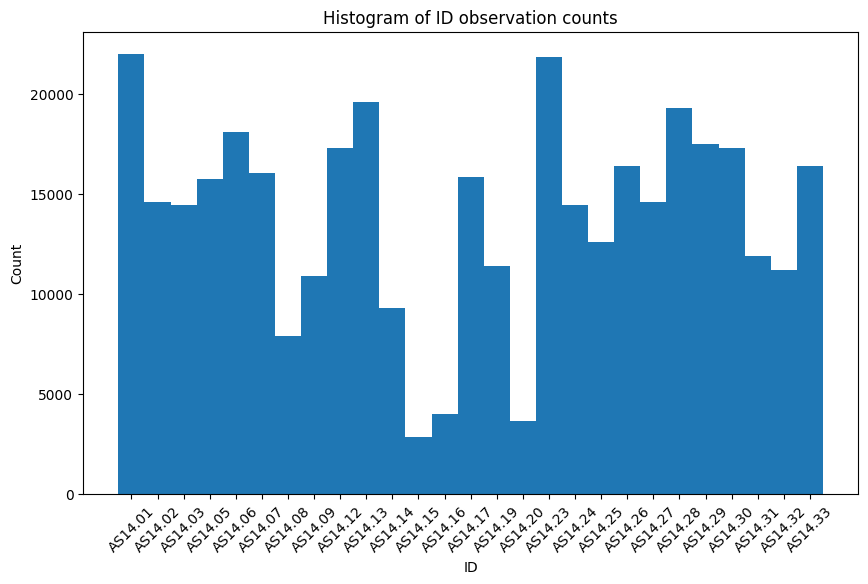

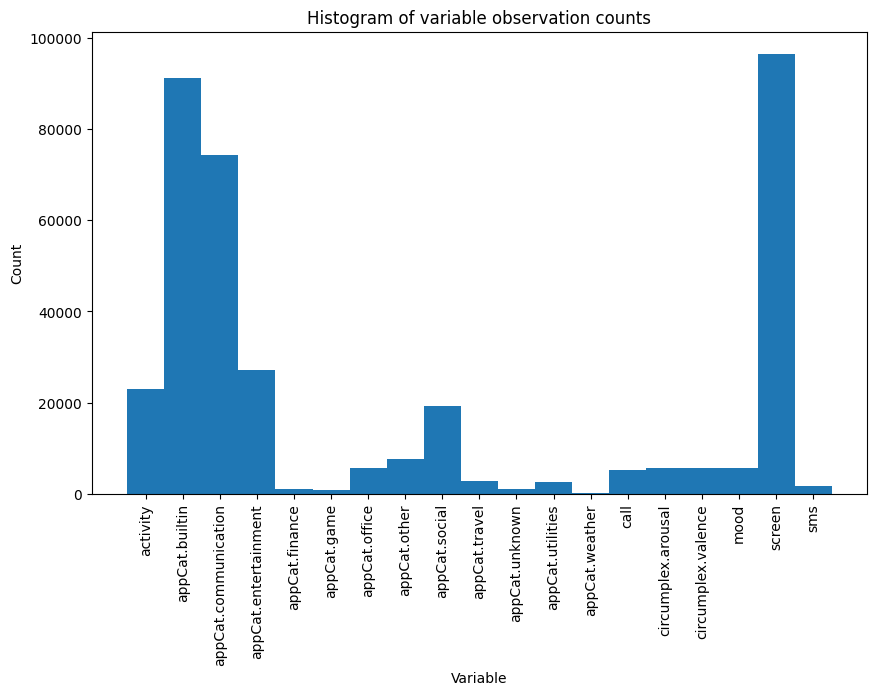

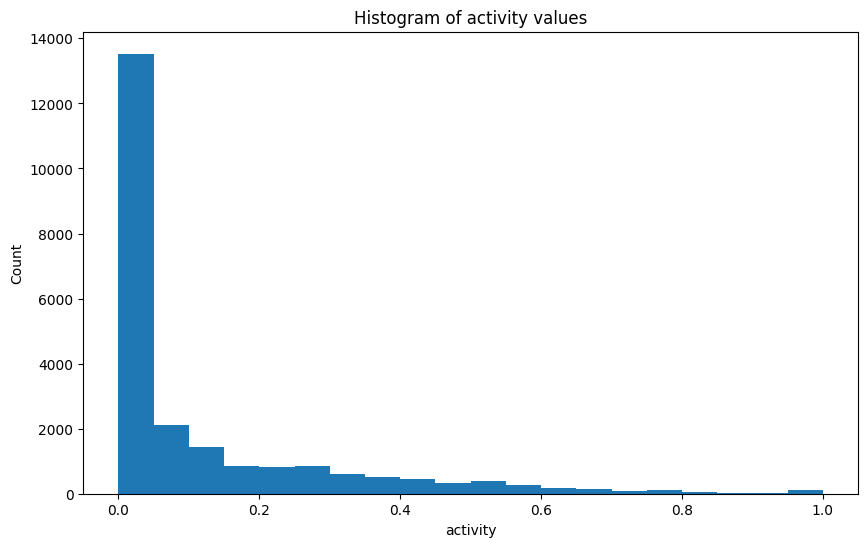

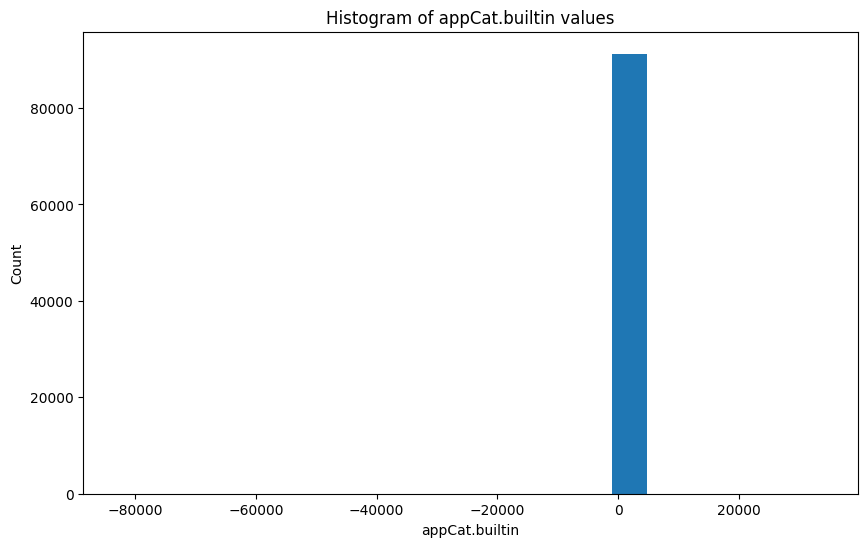

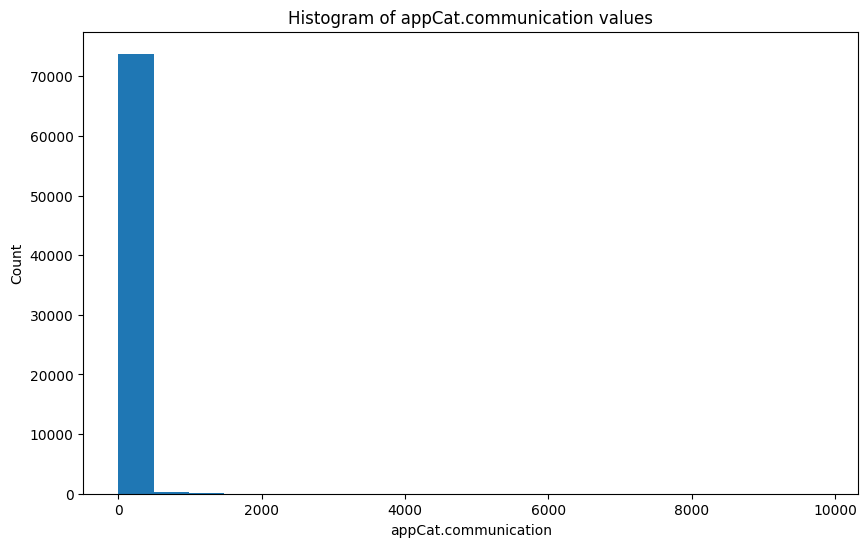

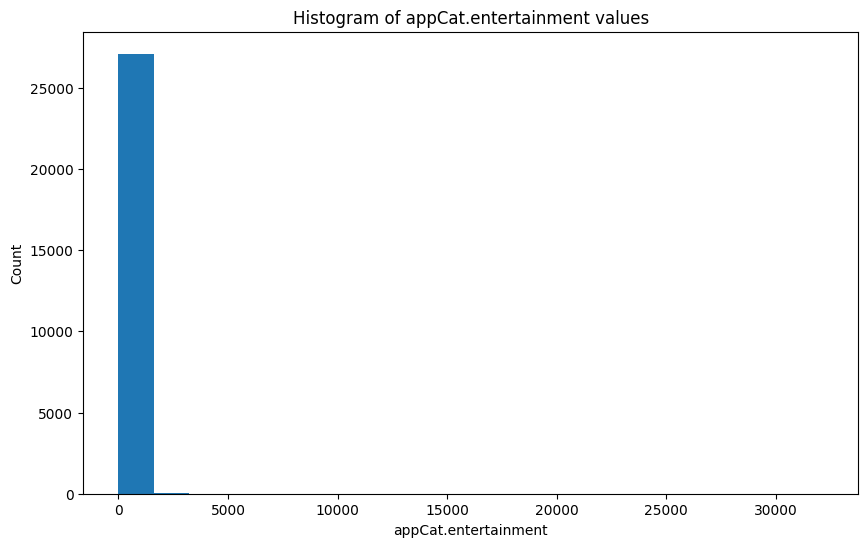

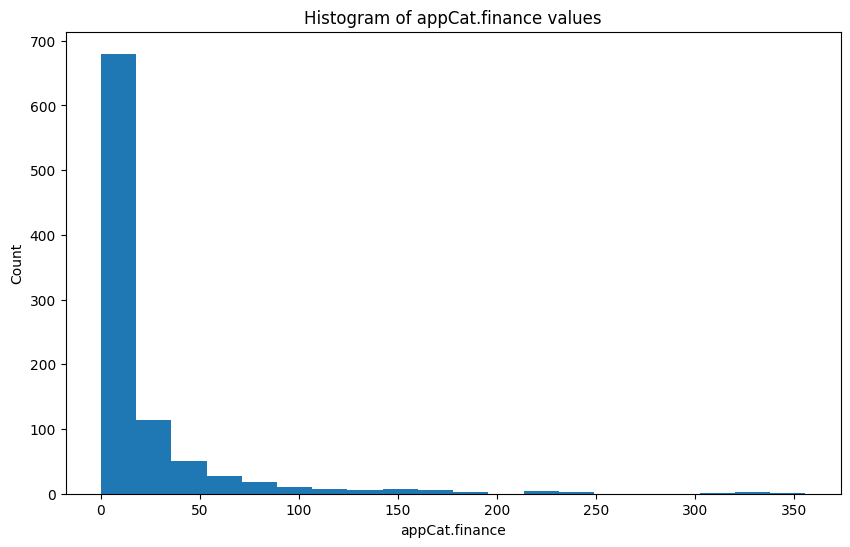

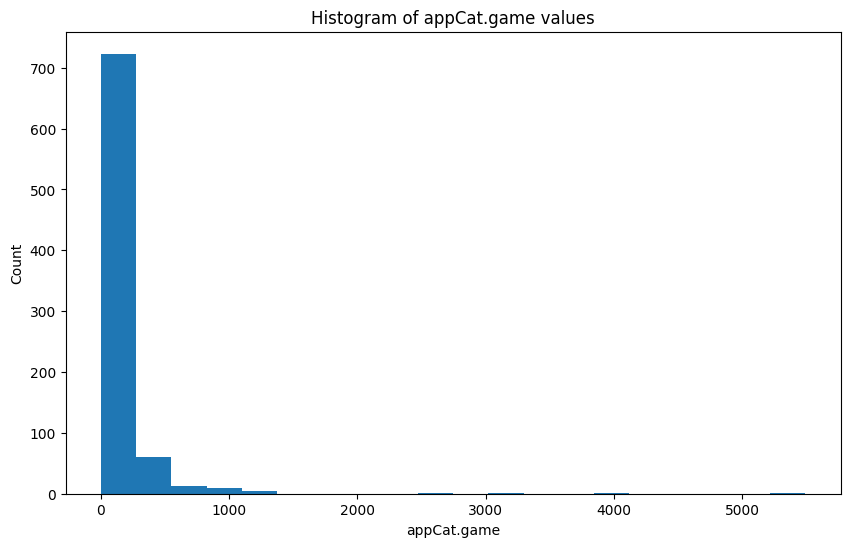

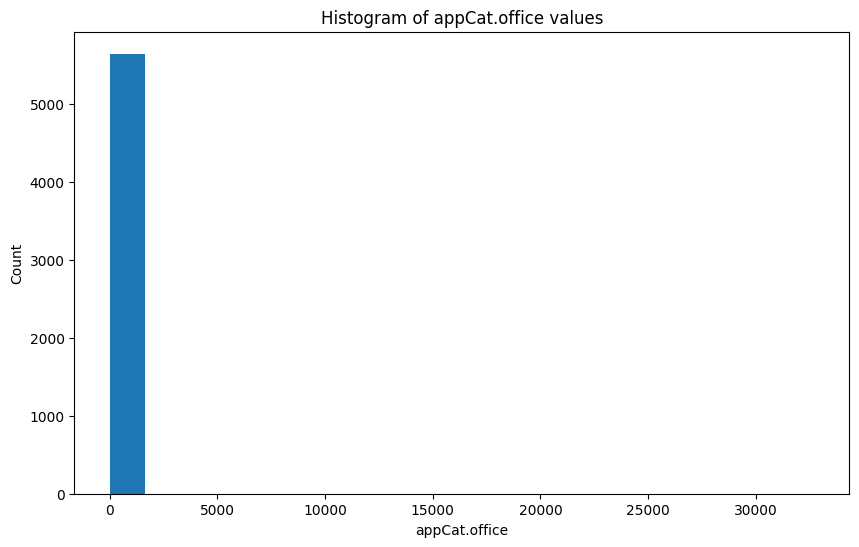

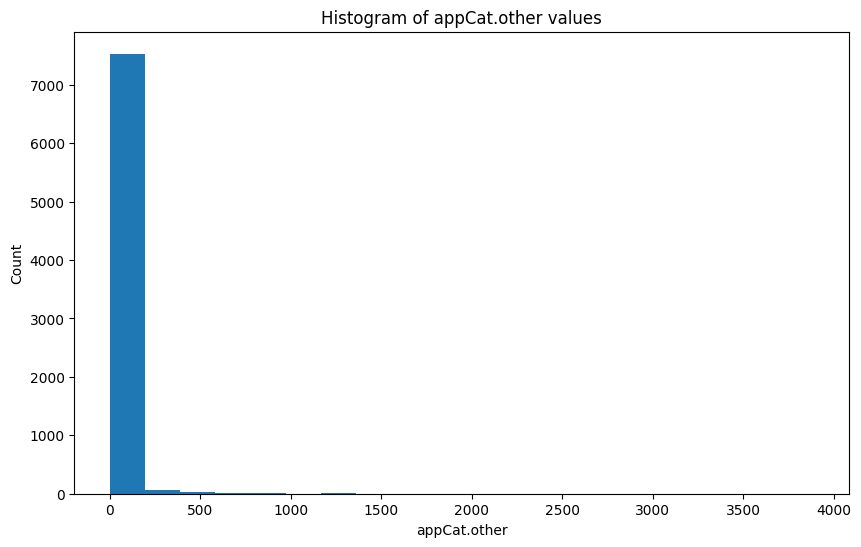

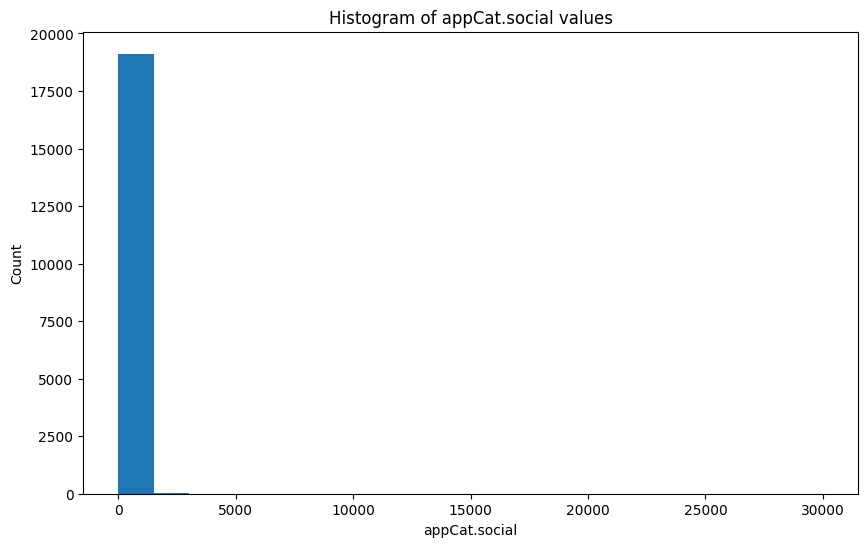

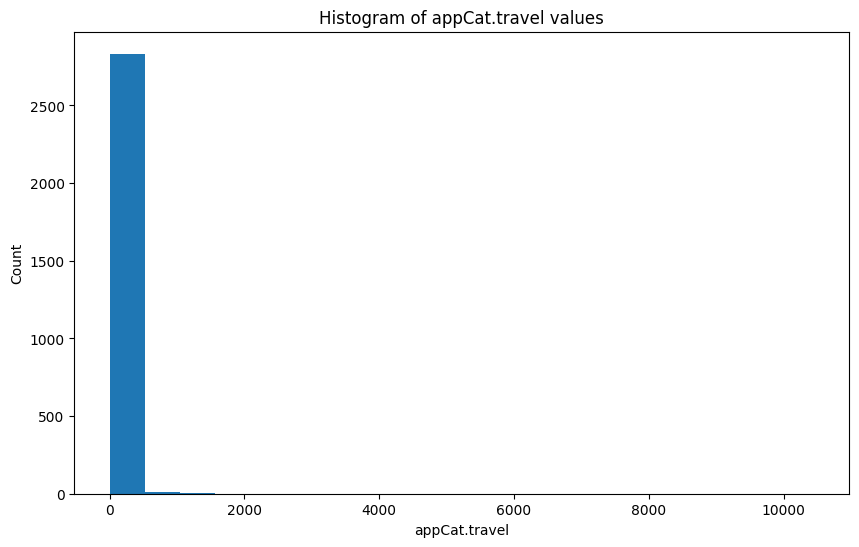

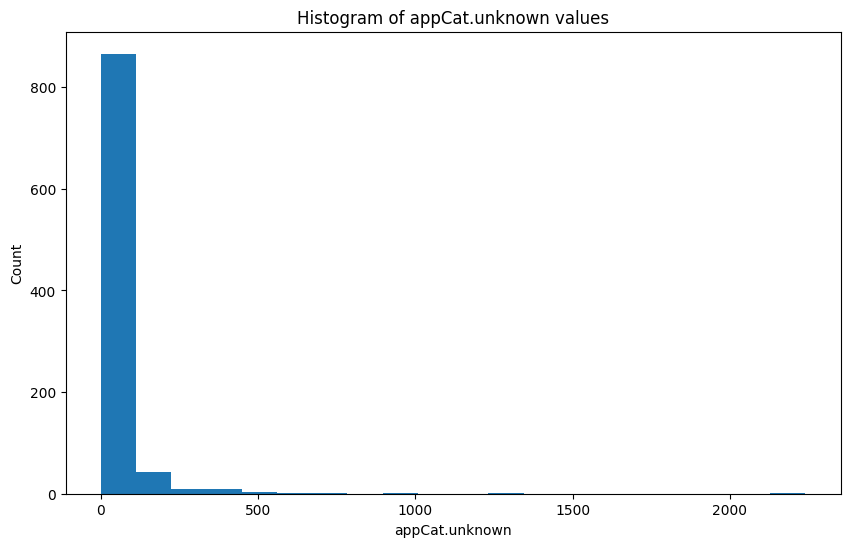

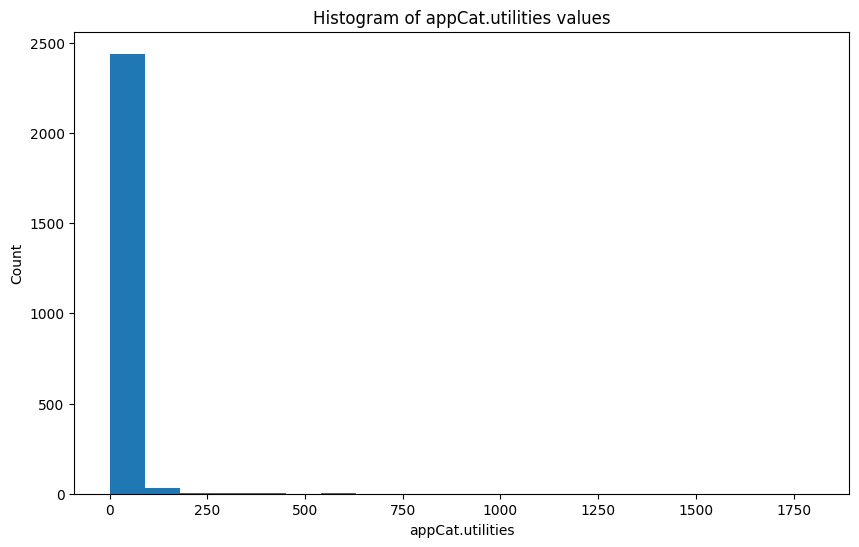

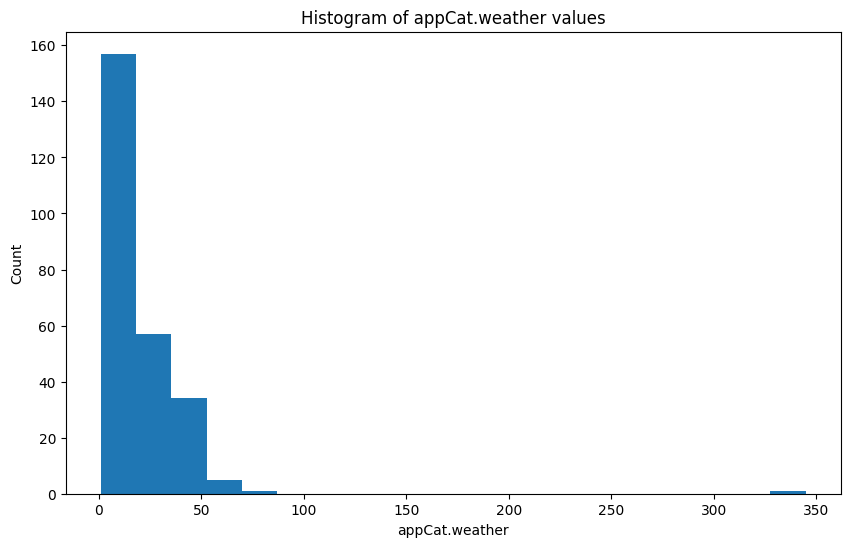

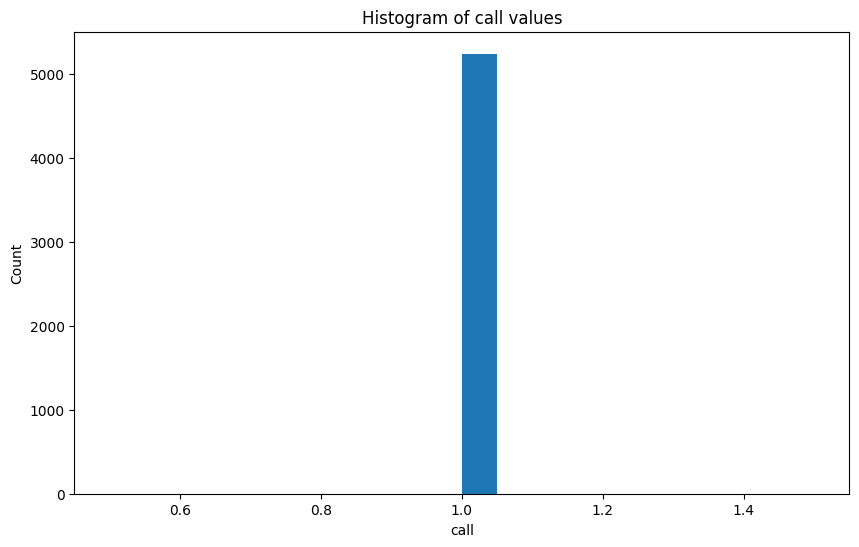

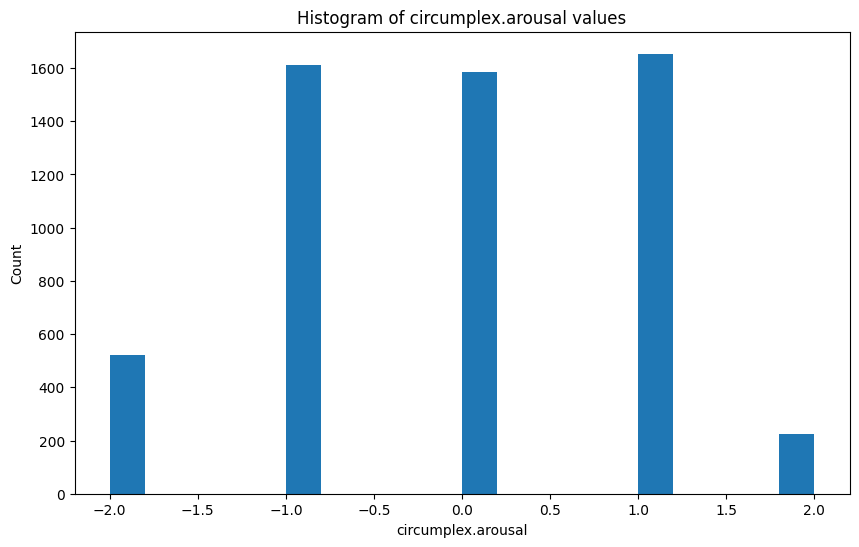

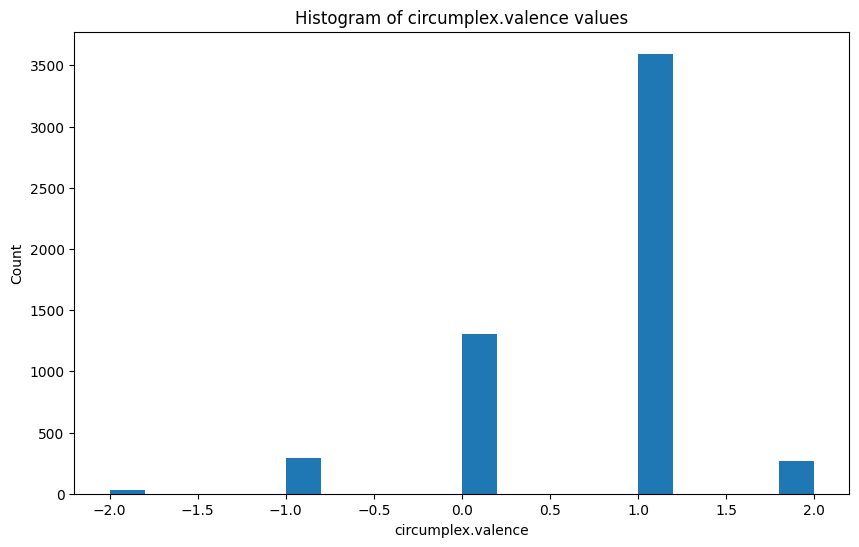

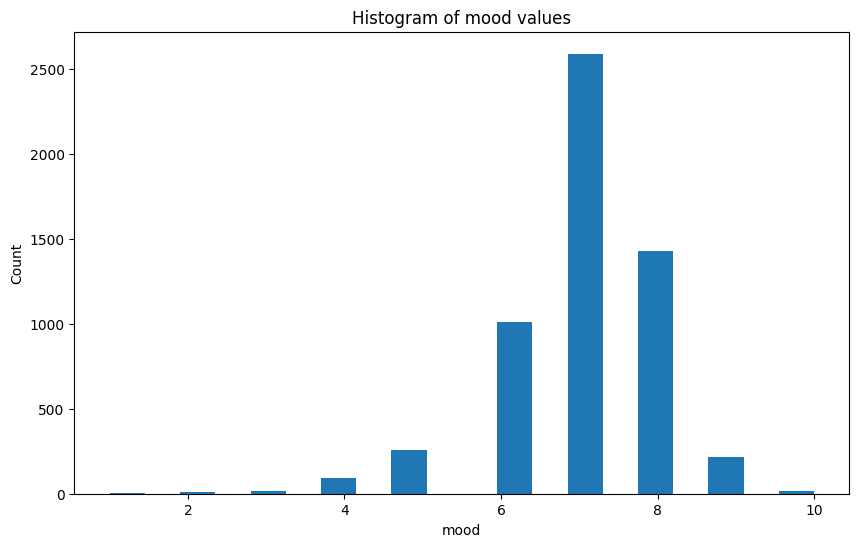

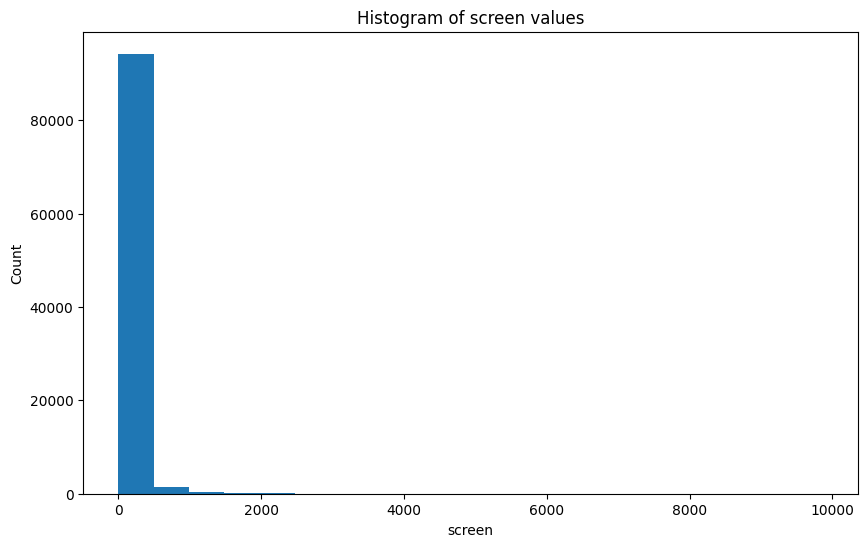

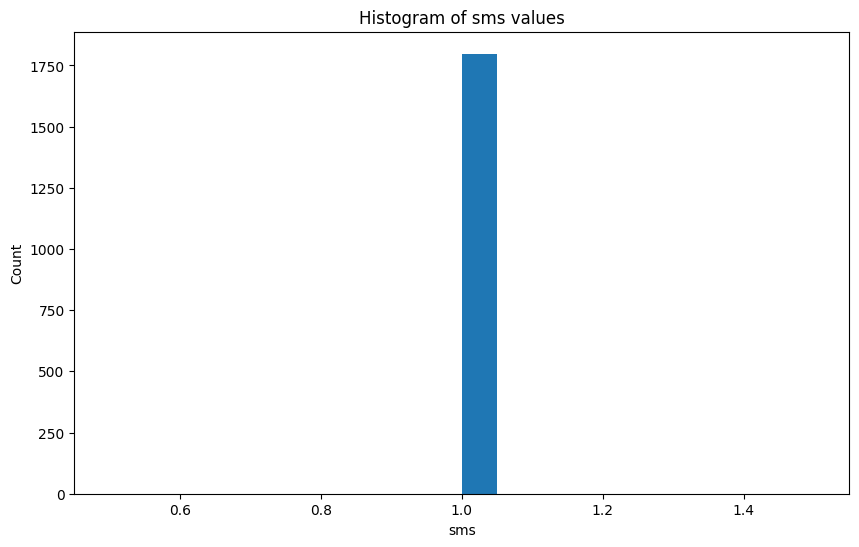

In [7]:
data_explorer.get_aggregated_data_plots(df)

In [13]:
df_transformed = data_explorer.transform_data(df, "1d")

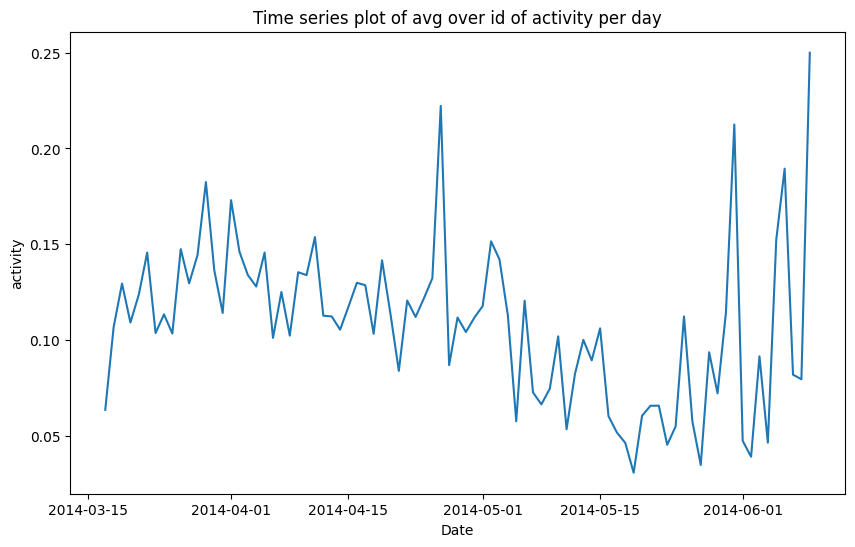

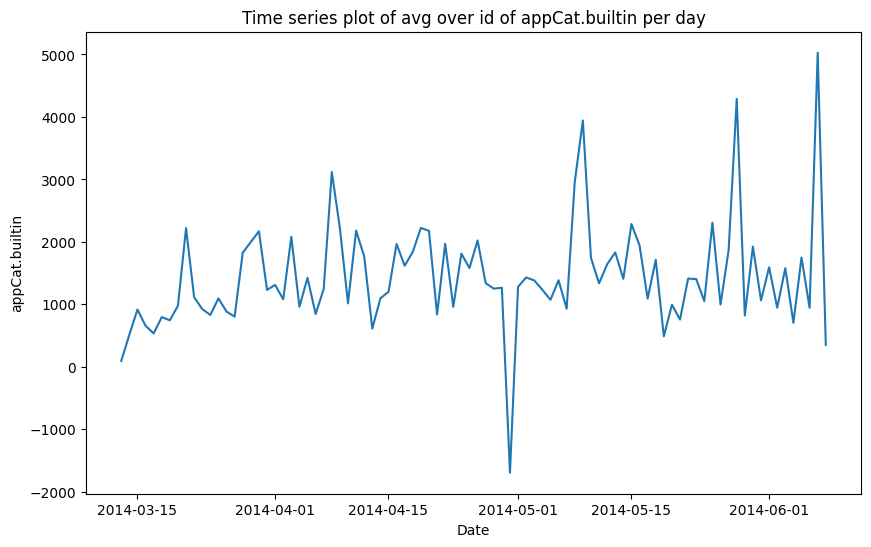

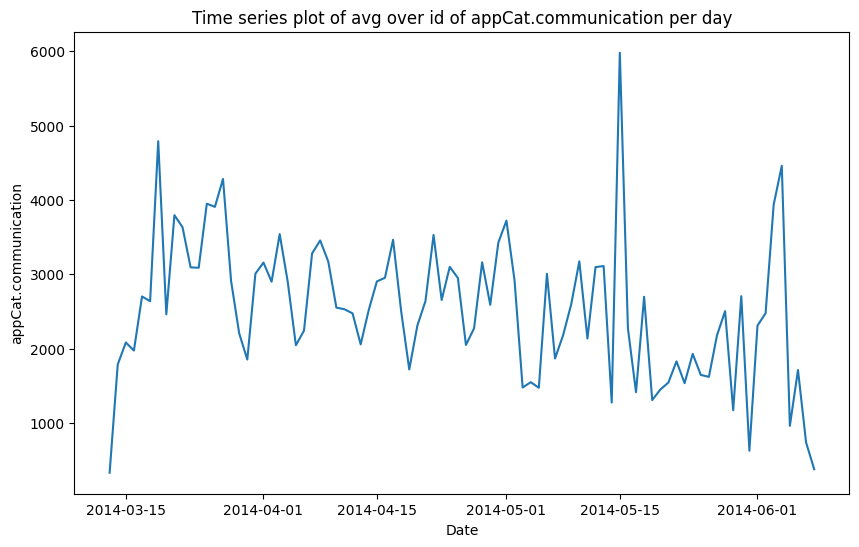

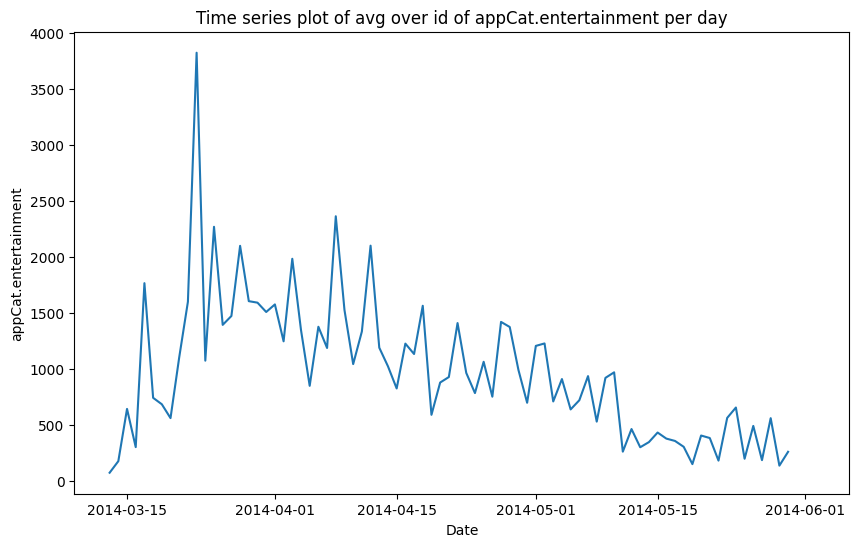

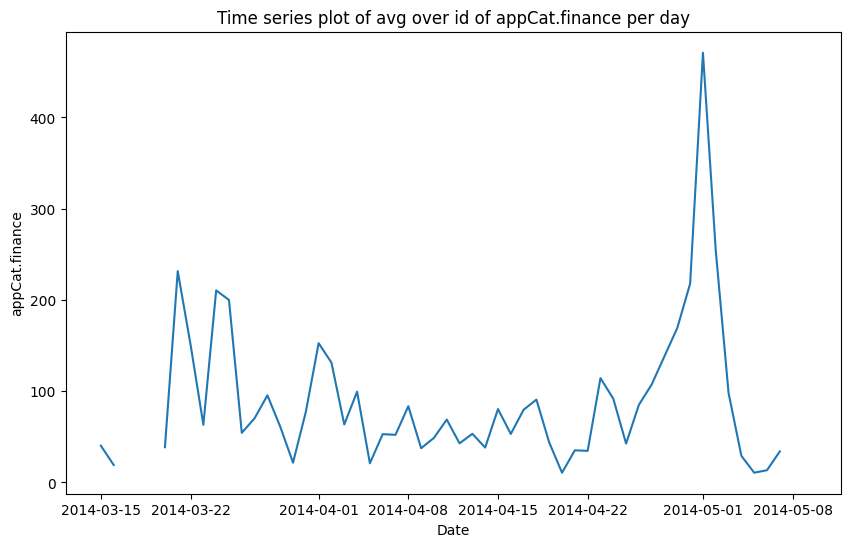

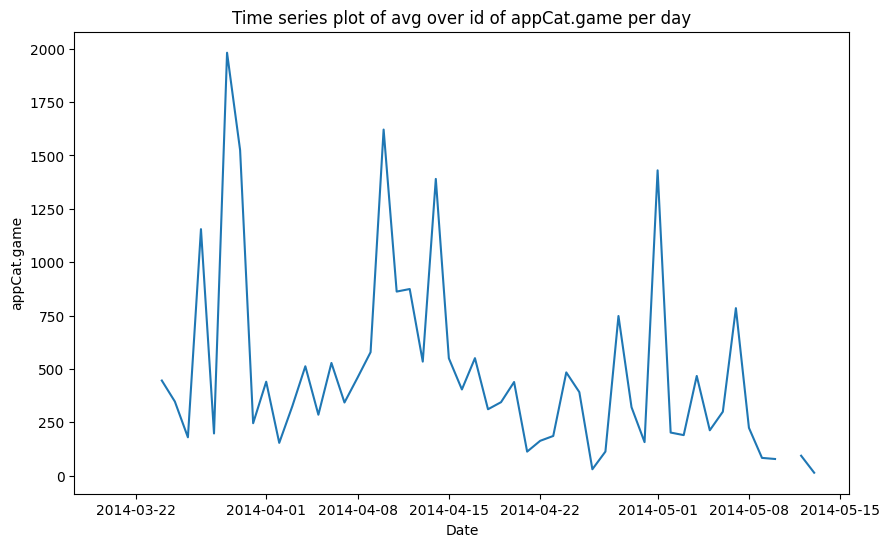

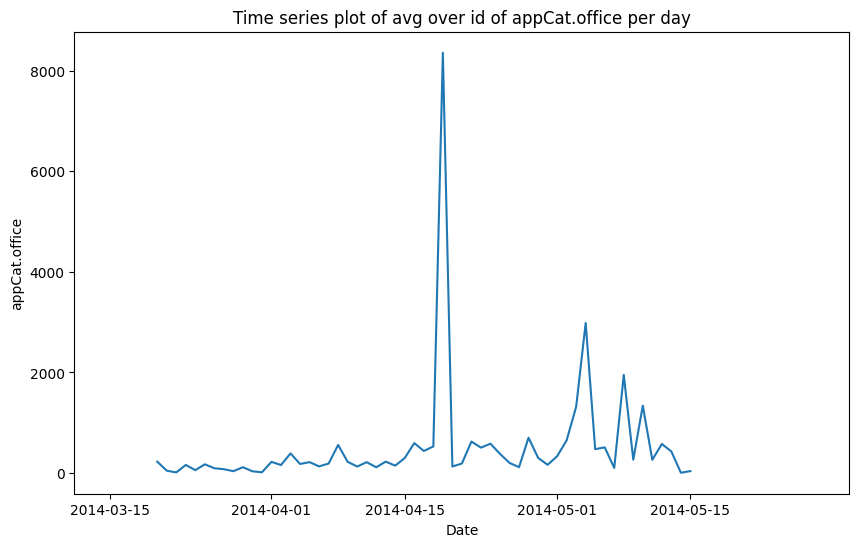

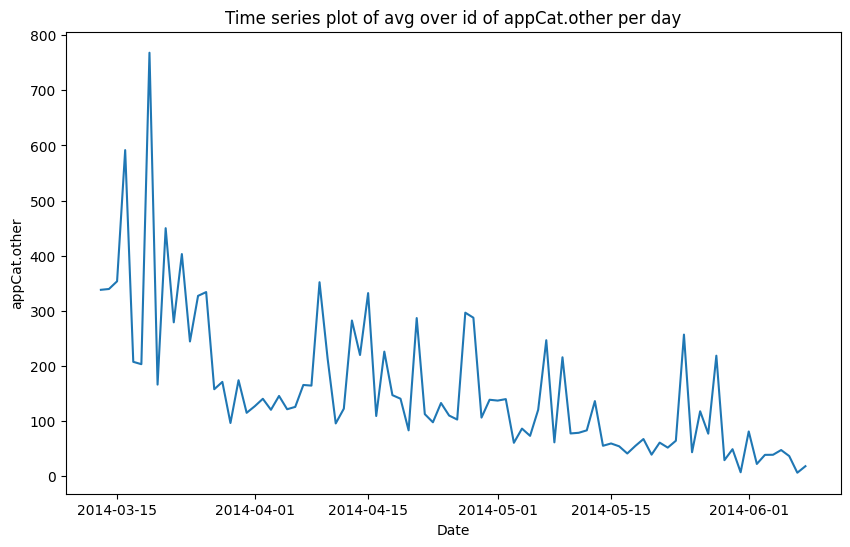

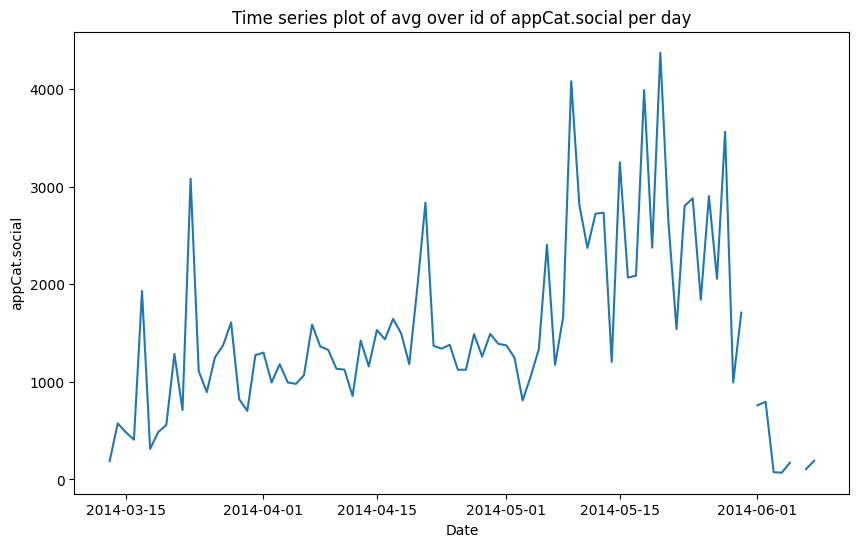

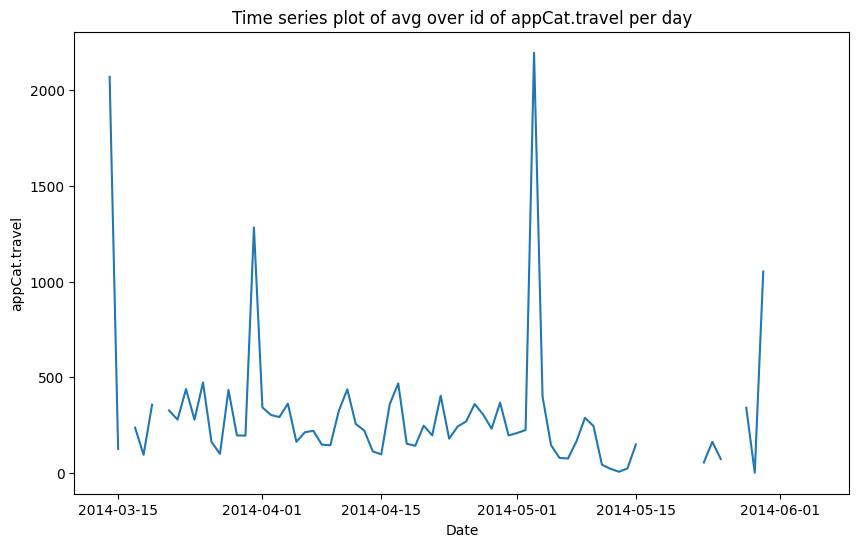

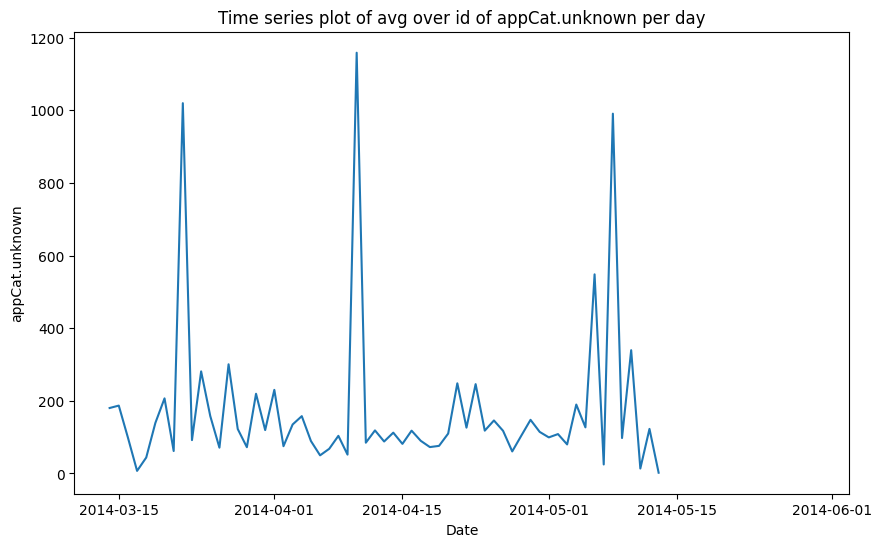

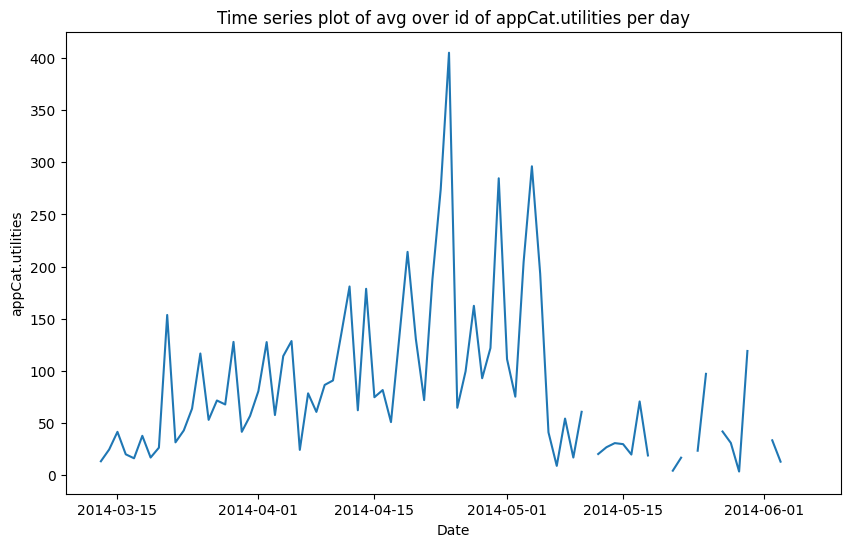

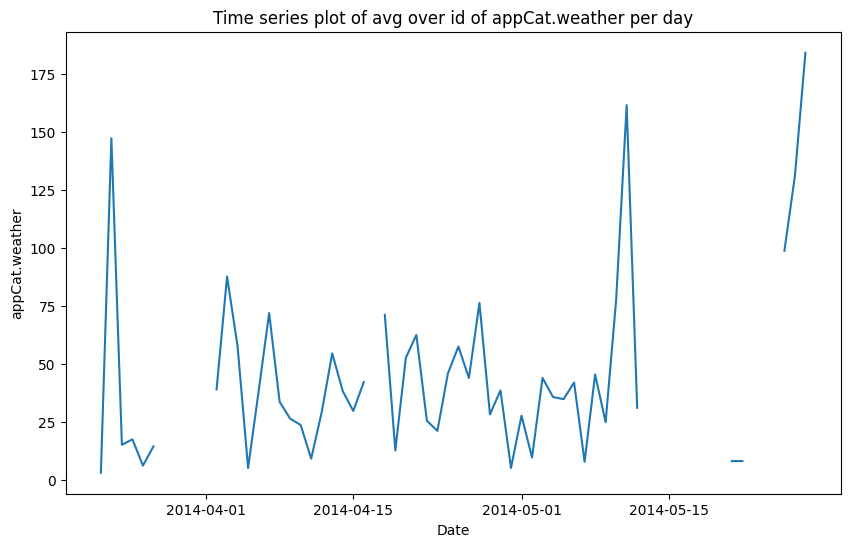

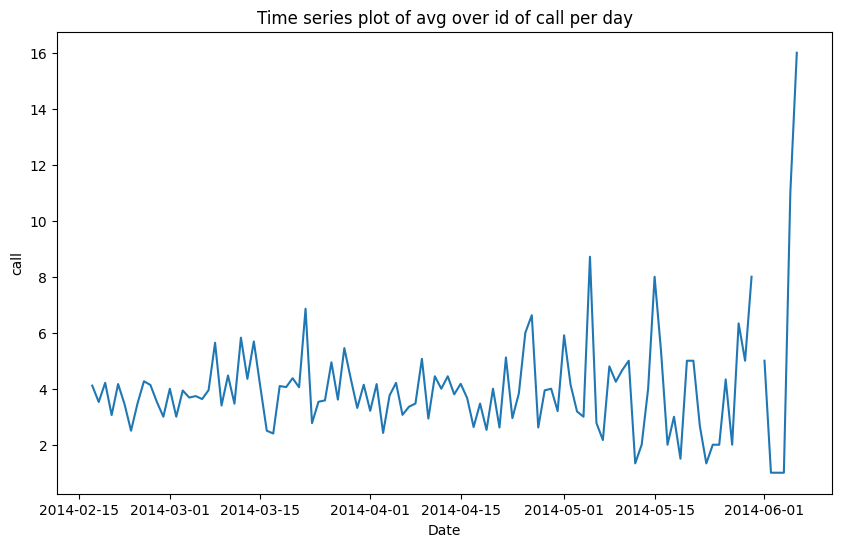

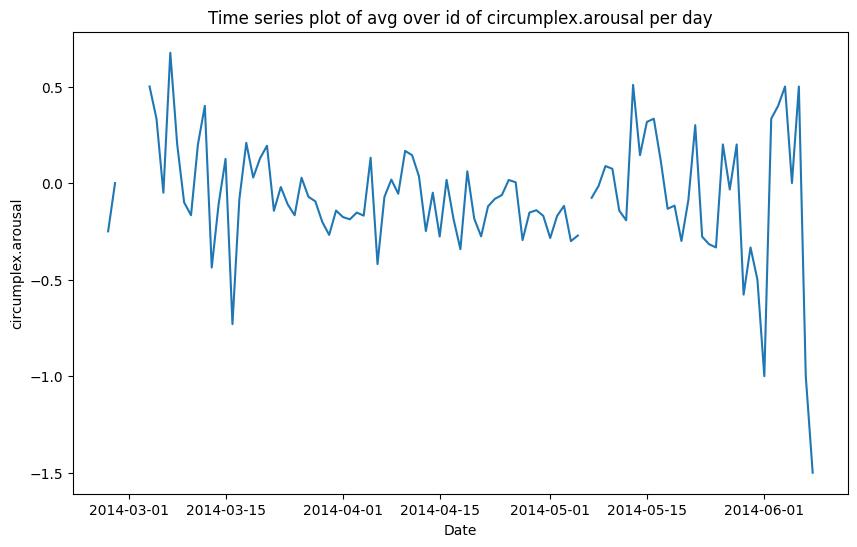

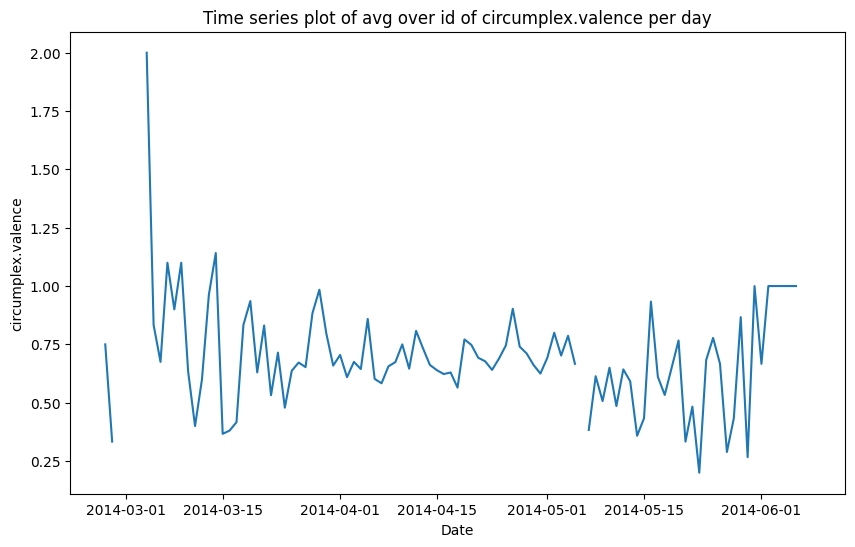

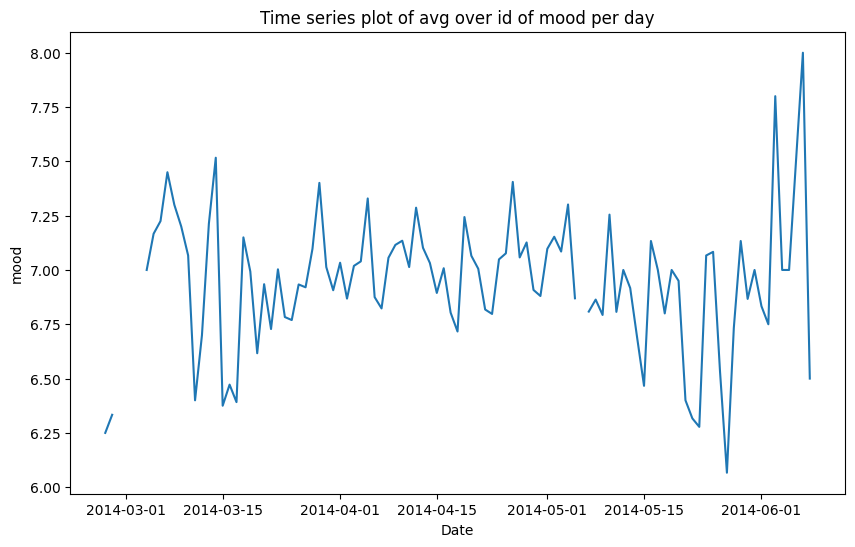

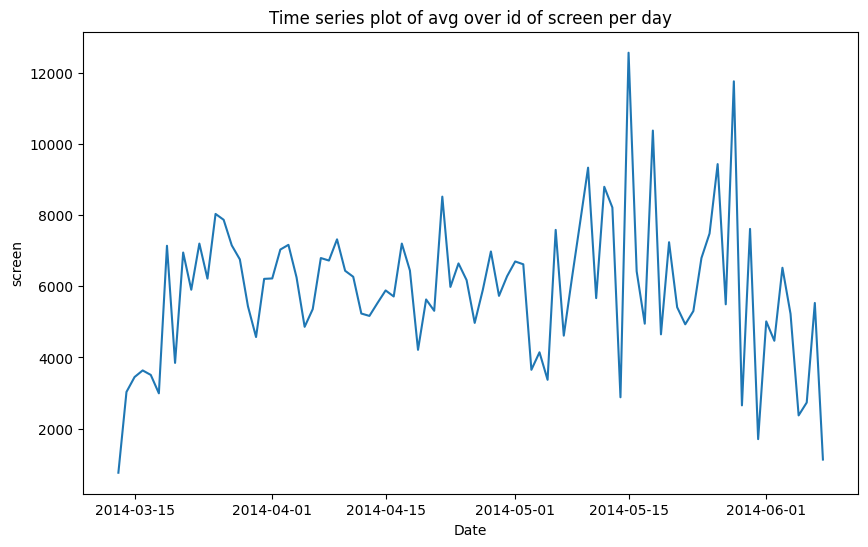

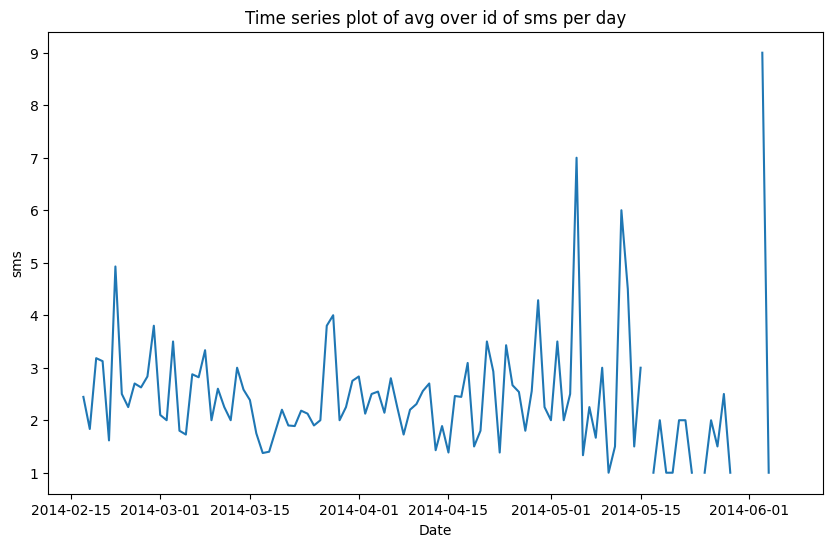

In [14]:
data_explorer.plot_time_series_data(df_transformed)

In [17]:
data_loader = DataPreprocessor()
df = data_loader.load_data()
df = data_loader.transform_data(df, "1d")

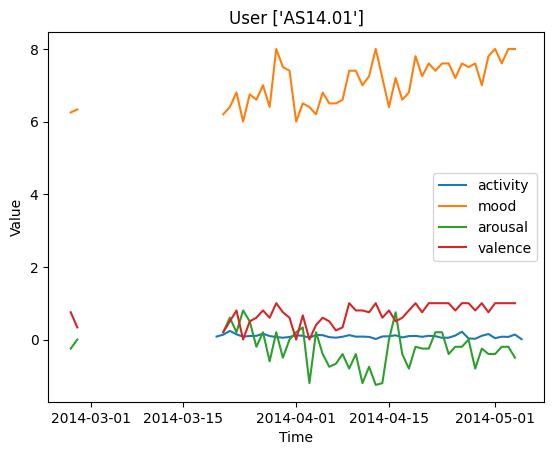

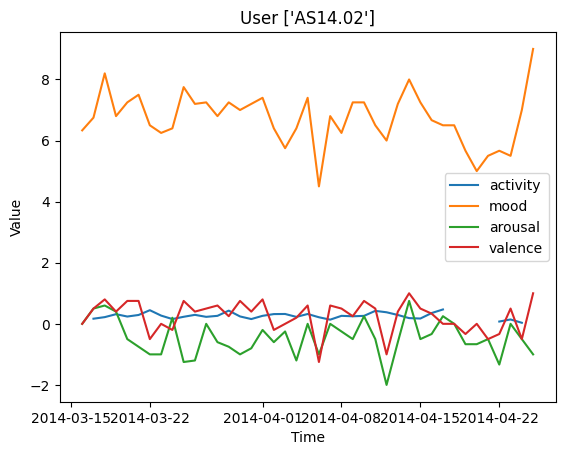

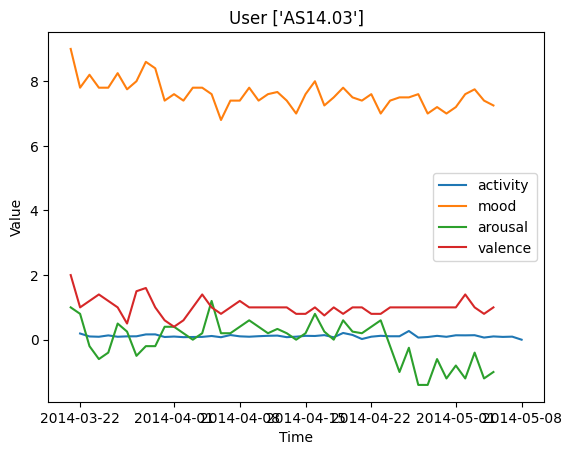

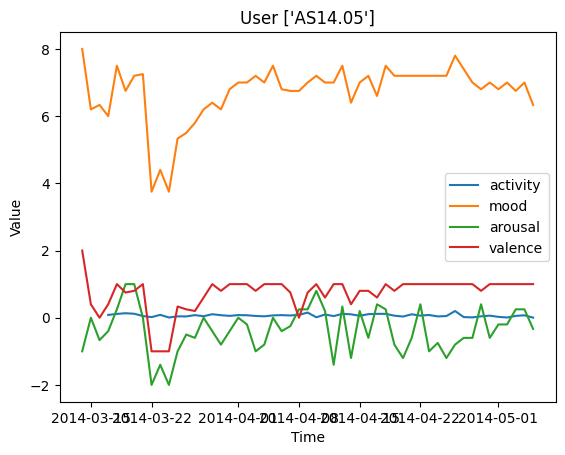

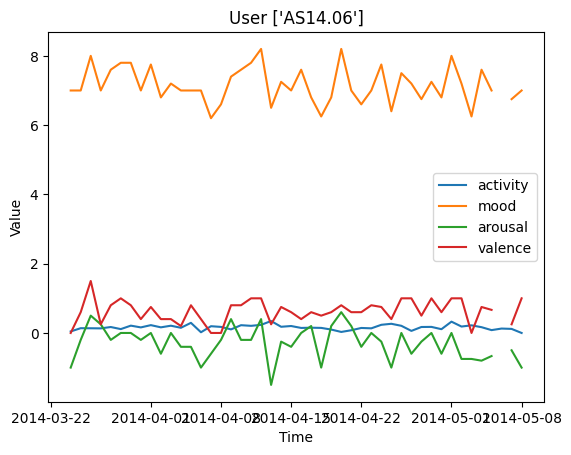

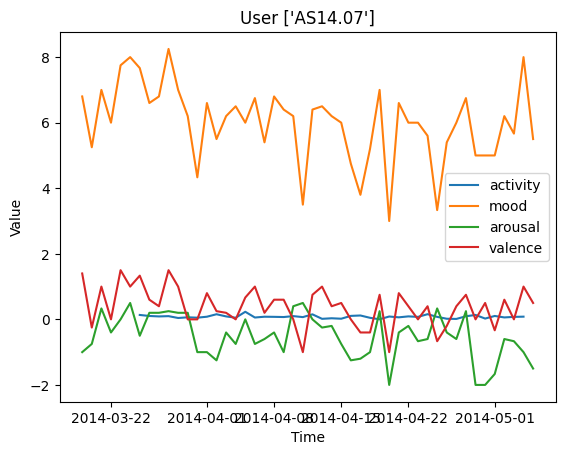

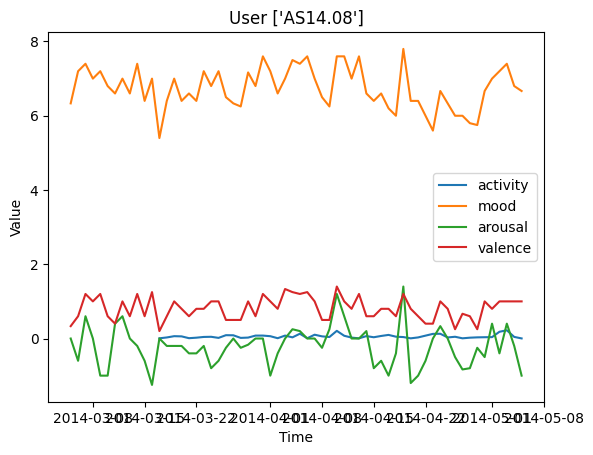

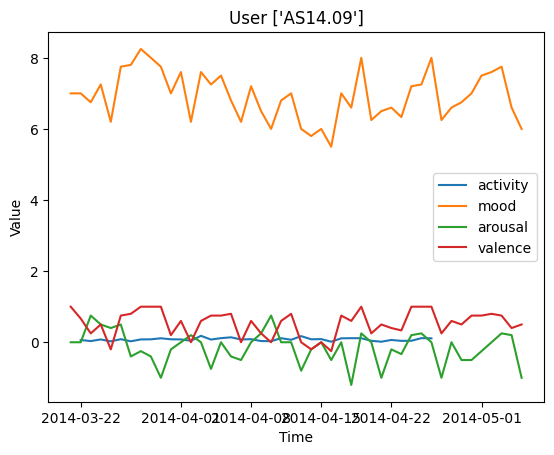

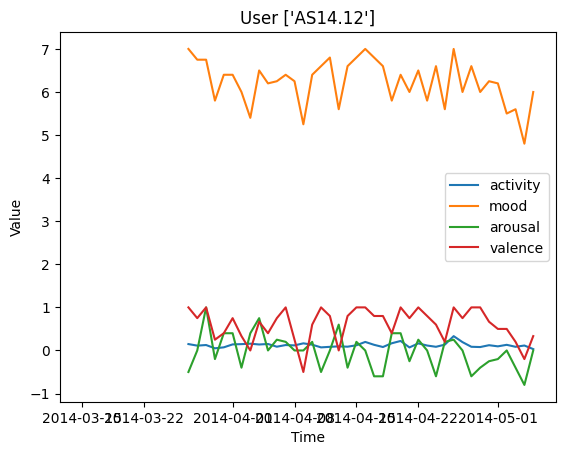

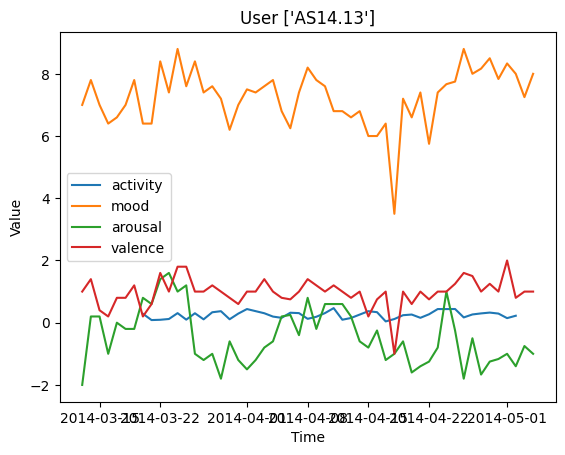

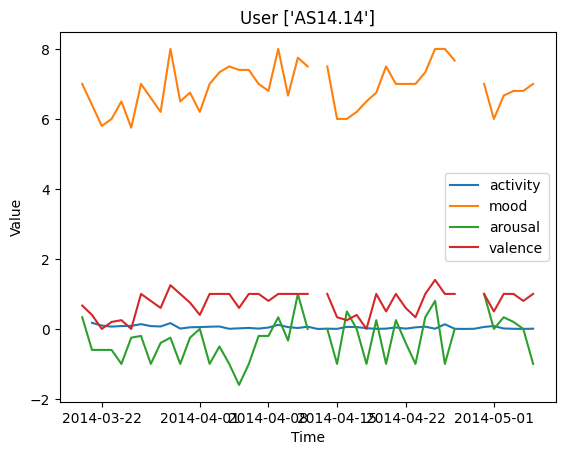

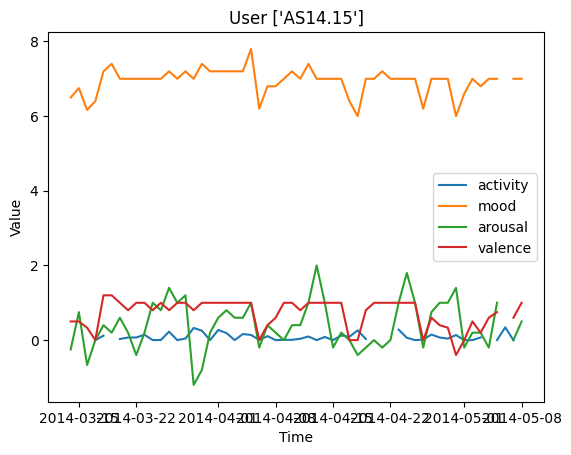

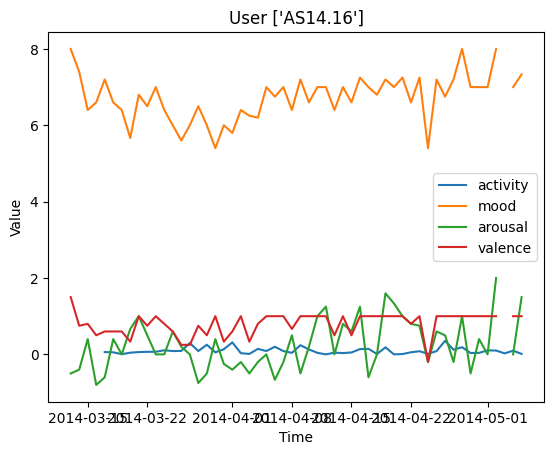

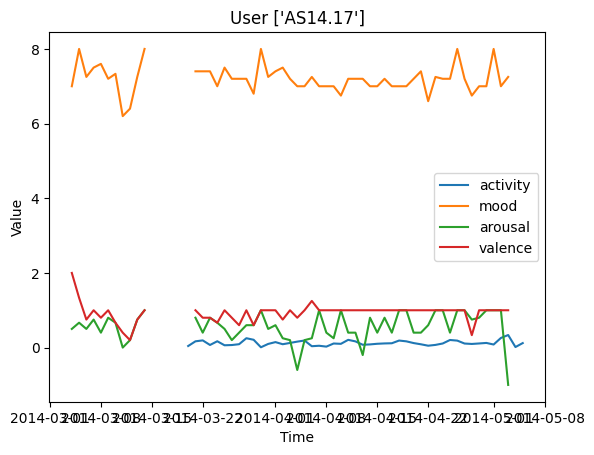

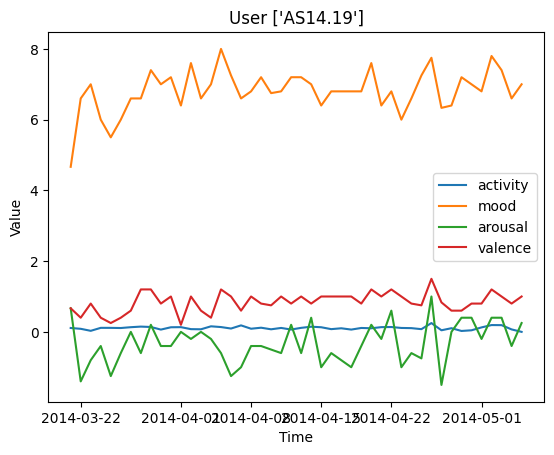

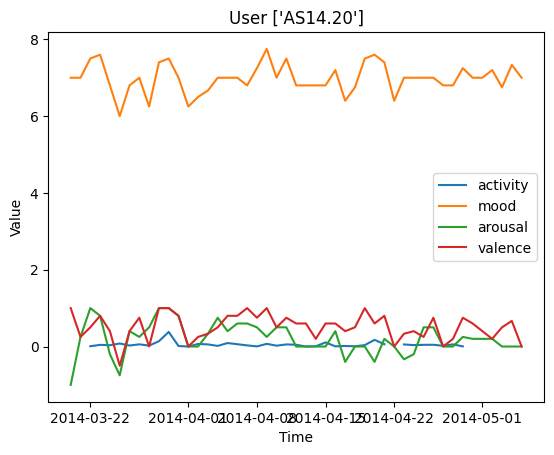

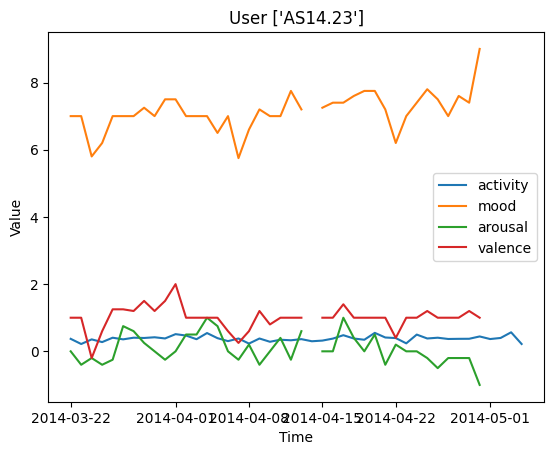

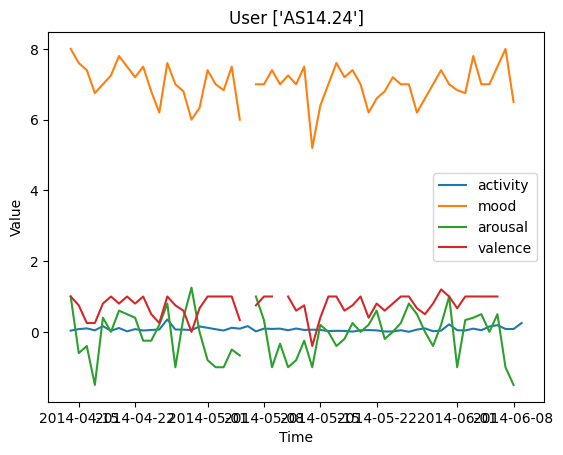

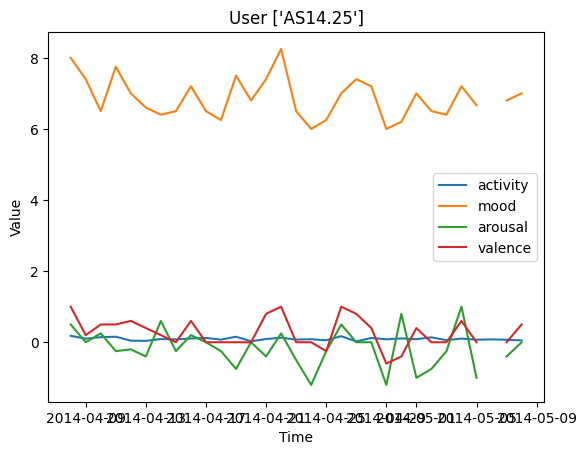

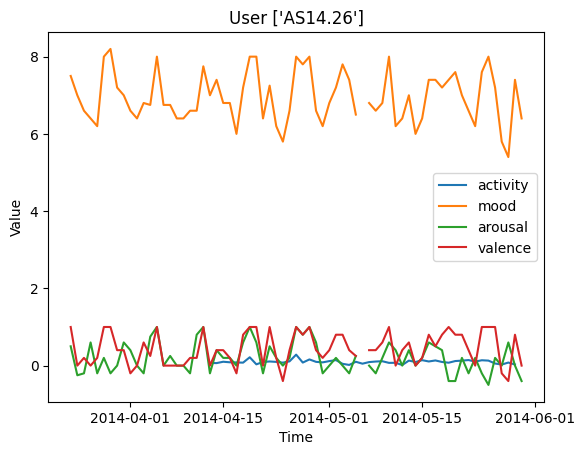

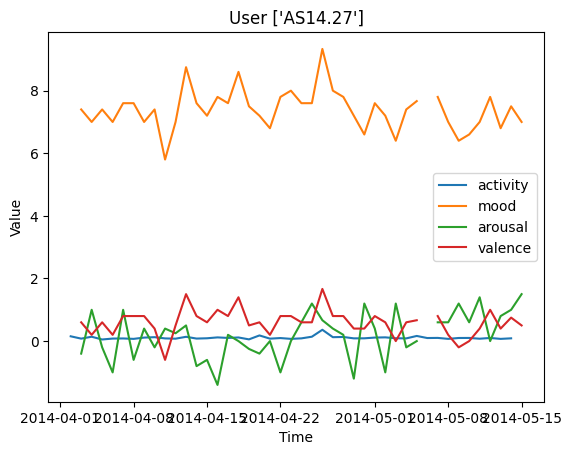

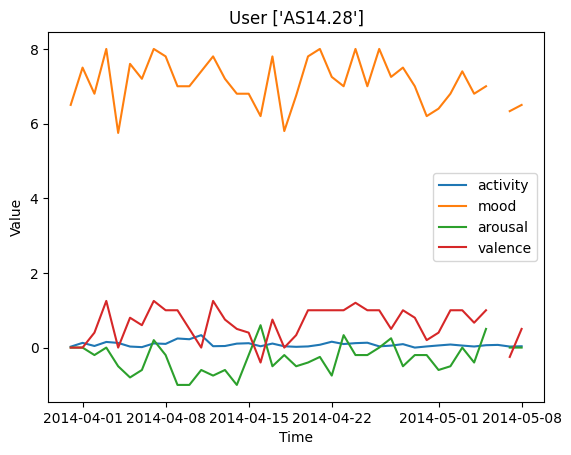

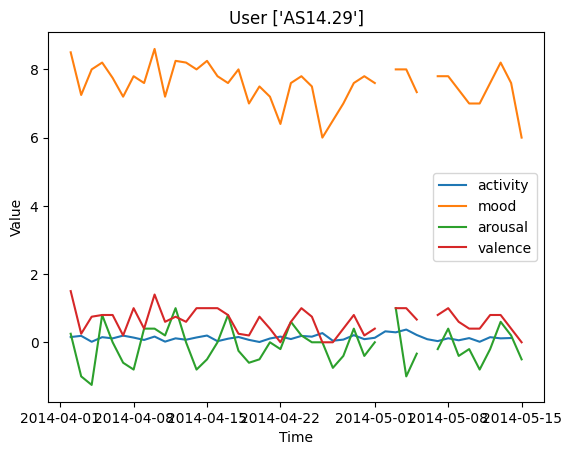

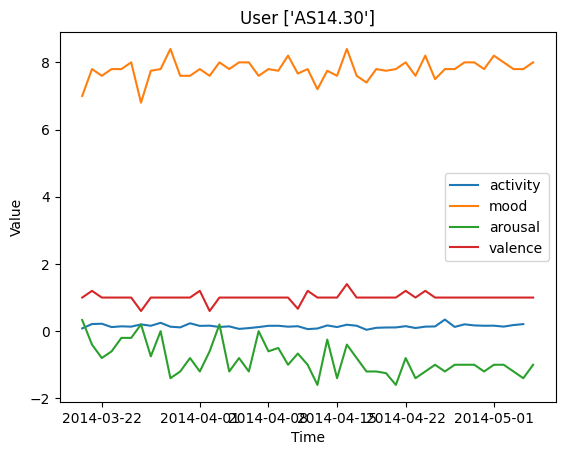

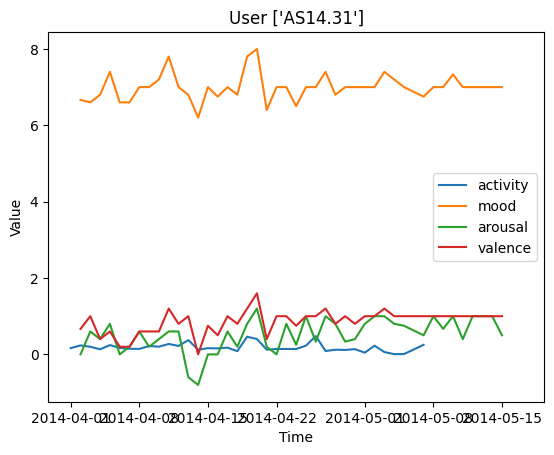

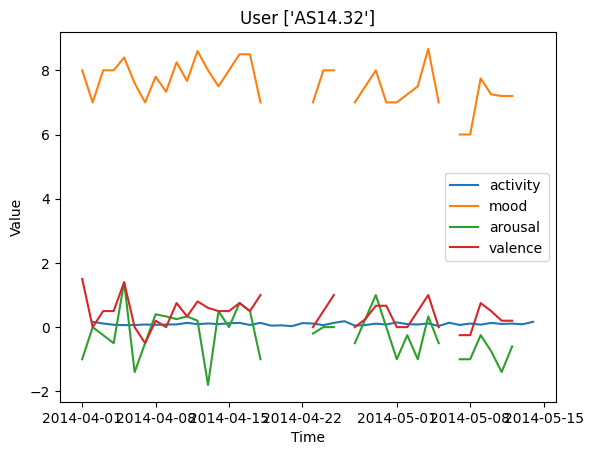

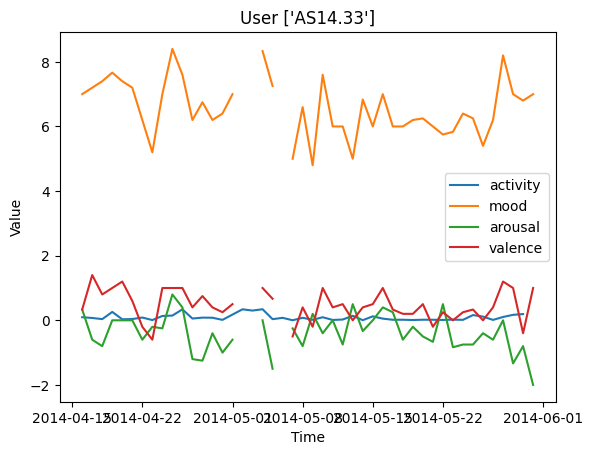

In [18]:
for i in df.sort("id").select("id").unique().to_numpy():
    df_filter = df.filter(pl.col("id") == i)
    df_filter_pd = df_filter.to_pandas()
    df_filter_pd = df_filter_pd.set_index("truncated_time")
    plt.plot(df_filter_pd.index, df_filter_pd["activity"], label="activity")
    plt.plot(df_filter_pd.index, df_filter_pd["mood"], label="mood")
    plt.plot(df_filter_pd.index, df_filter_pd["circumplex.arousal"], label="arousal")
    plt.plot(df_filter_pd.index, df_filter_pd["circumplex.valence"], label="valence")
    plt.title(f"User {i}")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.legend()
    plt.show()